In [4]:
import pandas as pd

df = pd.read_csv("C:/Users/pralo/AI-marketing-optimization/data/cleaned/mmm_model_ready.csv")
df.head()

,display_ads,social_ads,affiliate_ads,GMV,week,display_ads_lag_1,display_ads_lag_2,display_ads_lag_3,display_ads_lag_4,social_ads_lag_1,...,social_ads_lag_3,social_ads_lag_4,affiliate_ads_lag_1,affiliate_ads_lag_2,affiliate_ads_lag_3,affiliate_ads_lag_4,display_ads_4w_avg,social_ads_4w_avg,affiliate_ads_4w_avg,GMV_4w_avg
0,180.8,10.8,58.4,12.9,2022-01-30,151.5,17.2,44.5,230.1,41.3,...,39.3,37.8,58.5,69.3,45.1,69.2,98.500,34.325,57.825,12.775
1,8.7,48.9,75.0,7.2,2022-02-06,180.8,151.5,17.2,44.5,10.8,...,45.9,39.3,58.4,58.5,69.3,45.1,89.550,36.725,65.300,11.975
2,57.5,32.8,23.5,11.8,2022-02-13,8.7,180.8,151.5,17.2,48.9,...,41.3,45.9,75.0,58.4,58.5,69.3,99.625,33.450,53.850,12.600
3,120.2,19.6,11.6,13.2,2022-02-20,57.5,8.7,180.8,151.5,32.8,...,10.8,41.3,23.5,75.0,58.4,58.5,91.800,28.025,42.125,11.275
4,8.6,2.1,1.0,4.8,2022-02-27,120.2,57.5,8.7,180.8,19.6,...,48.9,10.8,11.6,23.5,75.0,58.4,48.750,25.850,27.775,9.250


In [6]:
y = df["GMV_4w_avg"]
feature_cols = [c for c in df.columns if c not in ["GMV", "week", "GMV_4w_avg"]]
X = df[feature_cols]

In [10]:
split_idx = (int)(len(df)* 0.8)
x_train = X.iloc[:split_idx]
x_test = X.iloc[split_idx:]

y_train = y.iloc[:split_idx]
y_test = y.iloc[split_idx:]

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [12]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = lr.predict(x_test)

print(f"linear r2_score is: {r2_score(y_test, y_pred)}")
print(f"linear mae score is: {mean_absolute_error(y_test, y_pred)}")


linear r2_score is: 0.8498033011715513
linear mae score is: 0.7688709966610429


In [16]:
lin_coef = pd.DataFrame({
    "feature": X.columns,
    "coefficients": lr.coef_
}).sort_values(by='coefficients', ascending = False)

lin_coef

,feature,coefficients
8,social_ads_lag_2,0.040703
9,social_ads_lag_3,0.036496
16,social_ads_4w_avg,0.035948
7,social_ads_lag_1,0.034571
1,social_ads,0.032021
0,display_ads,0.010006
5,display_ads_lag_3,0.009730
15,display_ads_4w_avg,0.009661
3,display_ads_lag_1,0.009631
4,display_ads_lag_2,0.009280


In [17]:
plot_df = pd.DataFrame({
    "week": df.iloc[len(y_train):]["week"].values,
    "actual_gmv": y_test.values,
    "predicted_gmv": y_pred
})

In [18]:
plot_df.head()

,week,actual_gmv,predicted_gmv
0,2025-01-26,11.175,11.881488
1,2025-02-02,11.975,12.496806
2,2025-02-09,13.875,13.776644
3,2025-02-16,15.150,15.002064
4,2025-02-23,14.525,14.131657


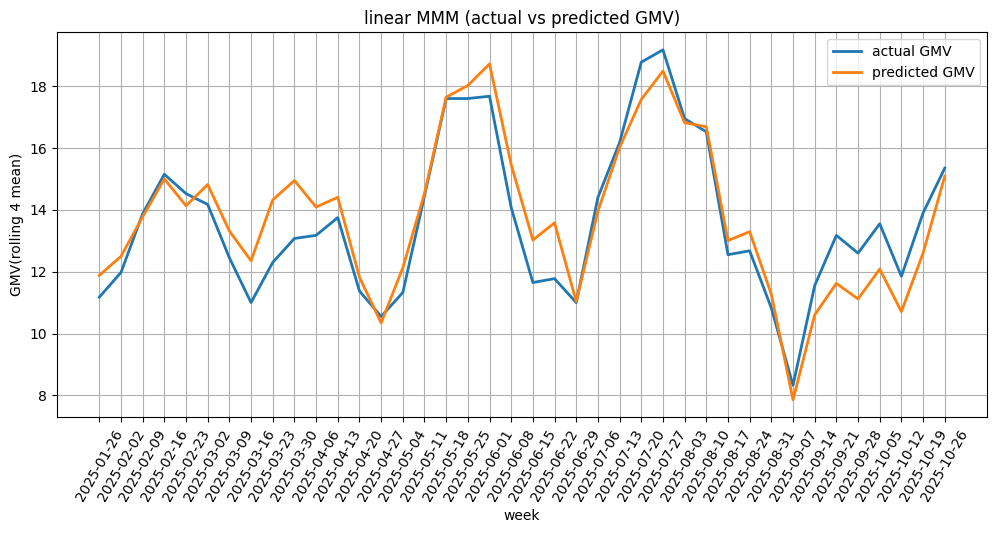

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 5))
plt.plot(plot_df["week"], plot_df["actual_gmv"], label="actual GMV", linewidth=2)
plt.plot(plot_df["week"], plot_df["predicted_gmv"], label = "predicted GMV", linewidth=2)

plt.title("linear MMM (actual vs predicted GMV)")
plt.xlabel("week")
plt.ylabel("GMV(rolling 4 mean)")
plt.xticks(rotation = 60)
plt.legend()
plt.grid(True)
plt.show()



## Conclusion — Linear MMM

The baseline linear regression model, trained using a time-aware split and lagged/rolling marketing features, captures the overall GMV trend well (R² ≈ 0.85 on the test set).

However, due to strong multicollinearity among lagged features, coefficient stability and attribution reliability may be limited. In the next step, we apply regularized regression (Ridge/Lasso) to stabilize coefficients while preserving interpretability.